In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score, f1_score ,classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Normalizer,MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_predict


import datetime
from datetime import timedelta
from sklearn.svm import SVC 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
df["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

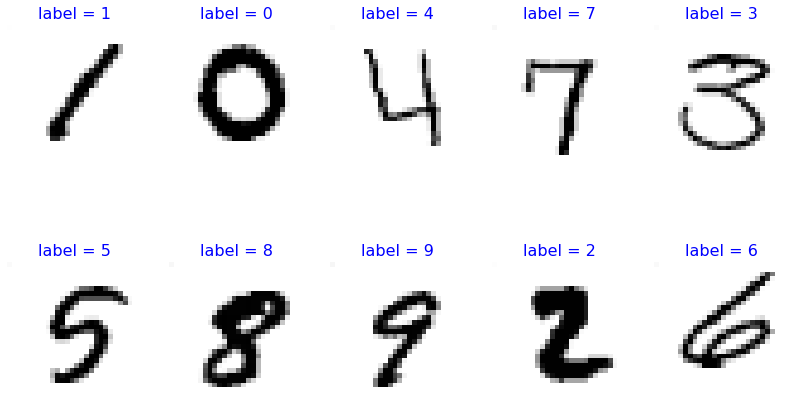

In [5]:
target_values = df['label'].unique()

img_key_value = {}    
for key in target_values:
    img_key_value[key] = df[df['label']==target_values[key]].iloc[0][:-1].values.reshape(28, 28)
    

    

img_label = list(img_key_value.keys())


fig, ax = plt.subplots(2, 5, figsize=(14, 8))  

i = 0
for row in range(2):
    for col in range(5):
        plt.sca(ax[row, col])
        plt.title(f'label = {img_label[i]}', fontsize=16, color='b')  
        plt.imshow(img_key_value[i], cmap='binary')  
        plt.axis('off')
        i+=1       

In [6]:
X = df.drop(columns=["label"])
y = df["label"]

In [7]:
max_value = np.max(X.max(axis=0))
max_value

255

In [8]:
X = X / max_value

In [9]:
x_train , x_valid , y_train , y_valid = train_test_split(X, y, test_size=.3,shuffle=True , random_state=66)

# KNN

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
y_pred_vaild = cross_val_predict(estimator=knn, X=x_train, y=y_train, cv=5)

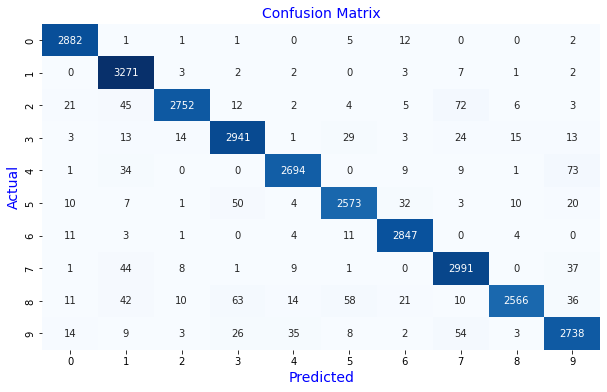

In [12]:
confmat_sgd_2 = confusion_matrix(y_train , y_pred_vaild)



plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd_2, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

In [13]:
accuracy_score(y_train , y_pred_vaild)

0.9610544217687075

# Test

In [14]:
y_pred_test = knn.predict(x_valid)

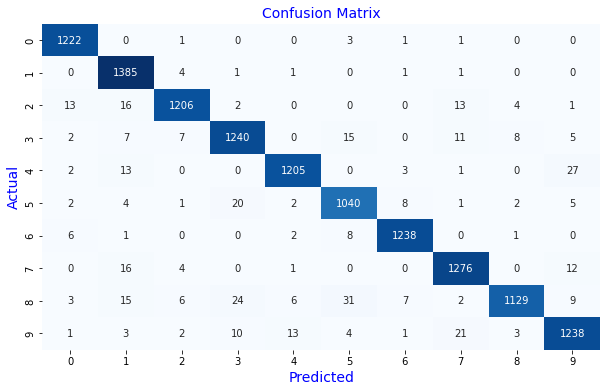

In [15]:
confmat_sgd_2 = confusion_matrix(y_valid , y_pred_test)



plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd_2, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

In [16]:
accuracy_score(y_valid , y_pred_test)

0.9665873015873016

# ----------------------------------------------------------------------------

# Separeted Test

In [17]:
df_test = pd.read_csv("test.csv")
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_test = df_test


In [19]:
max_value = np.max(X_test.max(axis=0))
max_value

255

In [20]:
X_test = X_test / max_value

In [21]:
y_pred_test_final = knn.predict(X_test)

In [22]:
y_pred_test_final

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [23]:
df_test["label"] = y_pred_test_final

In [24]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


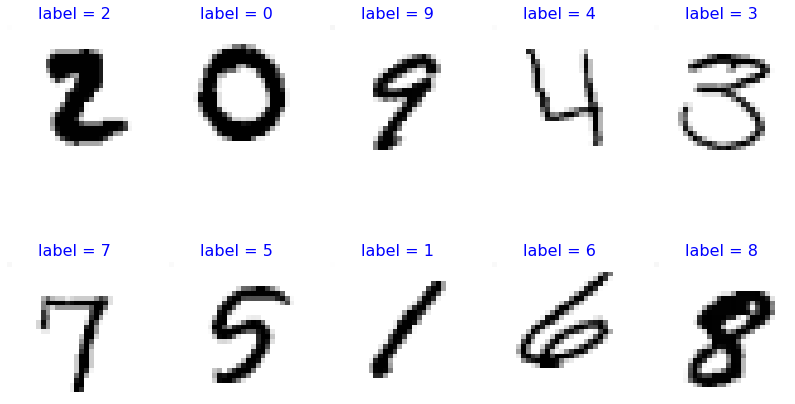

In [25]:
target_values = df_test['label'].unique()

img_key_value = {}    
for key in target_values:
    img_key_value[key] = df[df['label']==target_values[key]].iloc[0][:-1].values.reshape(28, 28)
    

    

img_label = list(img_key_value.keys())


fig, ax = plt.subplots(2, 5, figsize=(14, 8))  

i = 0
for row in range(2):
    for col in range(5):
        plt.sca(ax[row, col])
        plt.title(f'label = {img_label[i]}', fontsize=16, color='b')  
        plt.imshow(img_key_value[i], cmap='binary')  
        plt.axis('off')
        i+=1       